In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from helpers import categorical_univariate, categorical_bivariate, numerical_univariate, numerical_bivariate, categorical_test_statistic, numerical_test_statistic
import matplotlib.ticker as mtick
import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


## After briefly looking at the data we realize that there are no null values.

In [6]:
duplicate_rows = df[df.duplicated()]

print ("Duplicated rows are:")
duplicate_rows

Duplicated rows are:


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [7]:
print(df.drop_duplicates())

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4645    Masters         2017       Pune            2   31  Female          No   
4647  Bachelors         2016       Pune            3   30    Male          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   

      ExperienceInCurrentDo

<h3> After looking at the dulpicated rows, we see that there are a few so we drop them. 

In [8]:
df["LeaveOrNot"].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

<h3>LeaveOrNot is a categorical column that is encoded in binary in numeric to make it simpler

# 1 Categorical univariate analysis

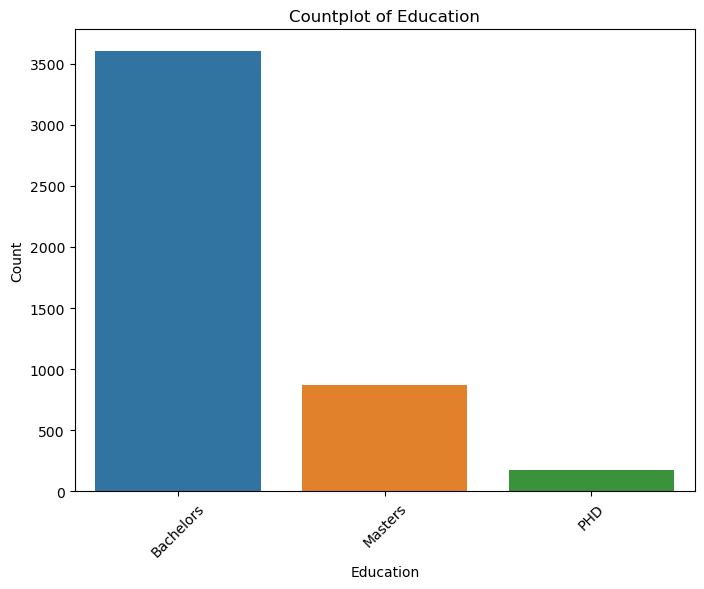

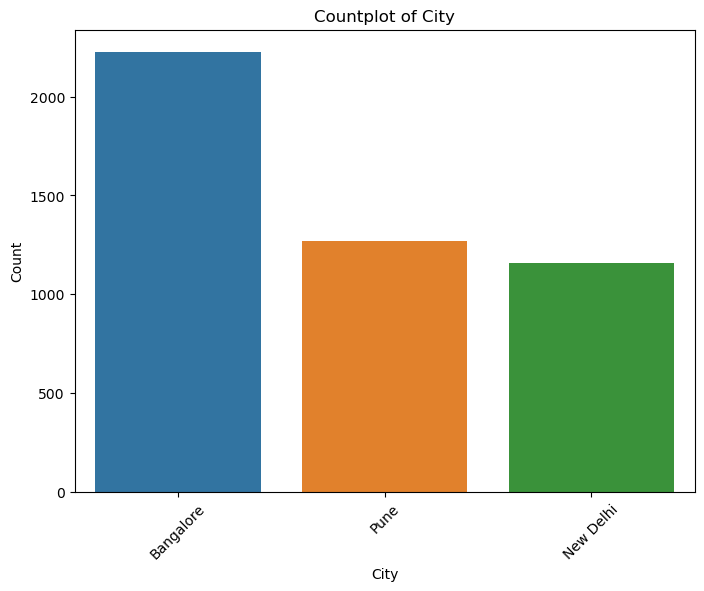

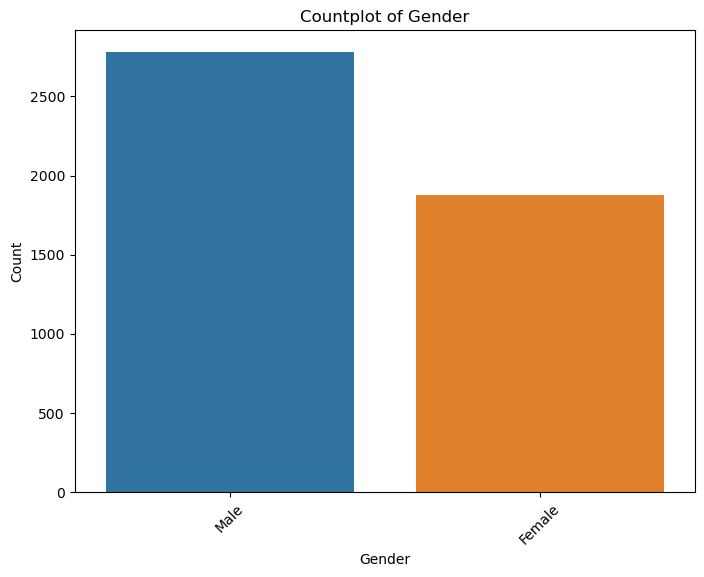

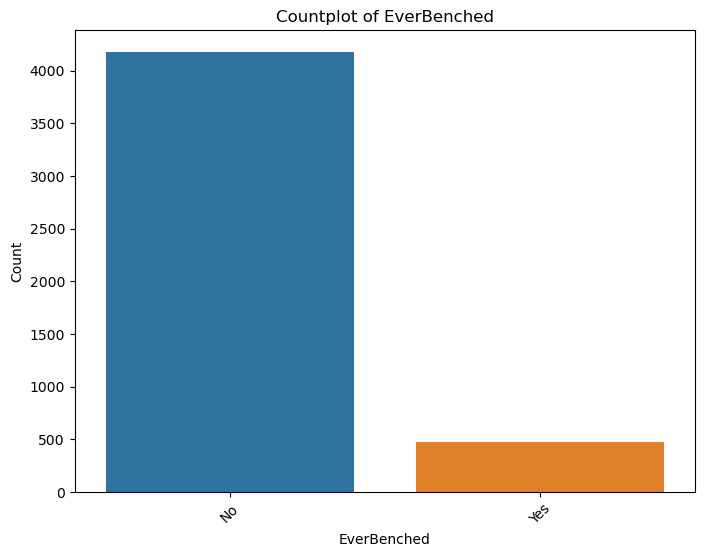

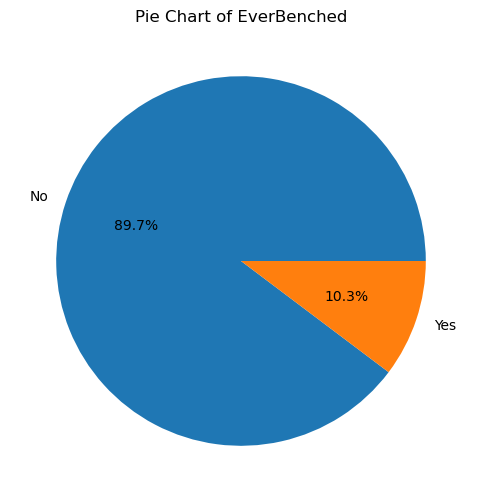

In [9]:
categorical_columns = list(df.select_dtypes(include=['object','category']).columns)

categorical_univariate(df, categorical_columns)

# 2 Categorical bivariate analysis

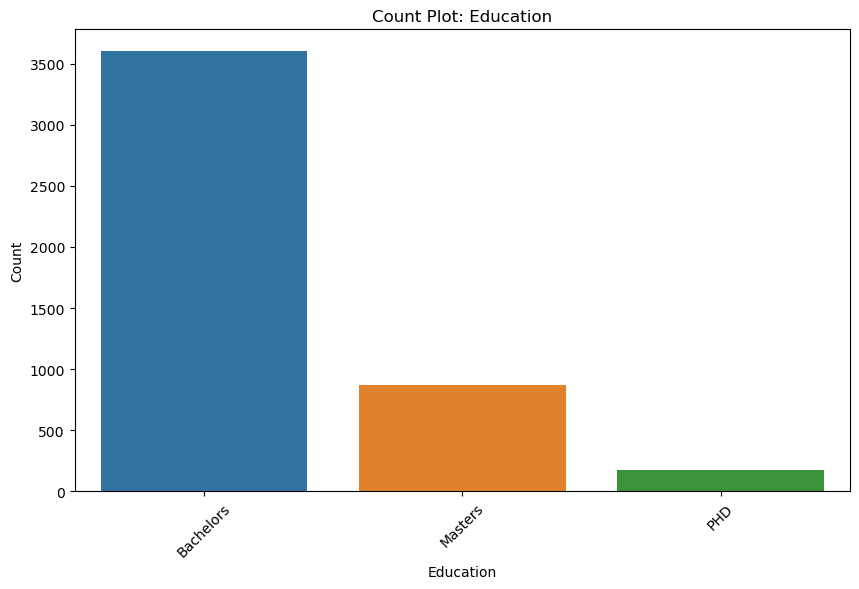

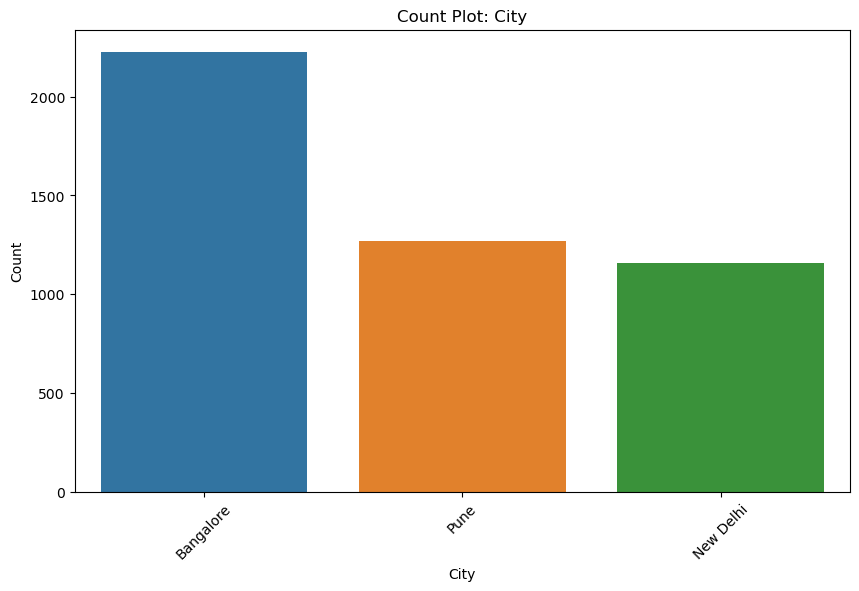

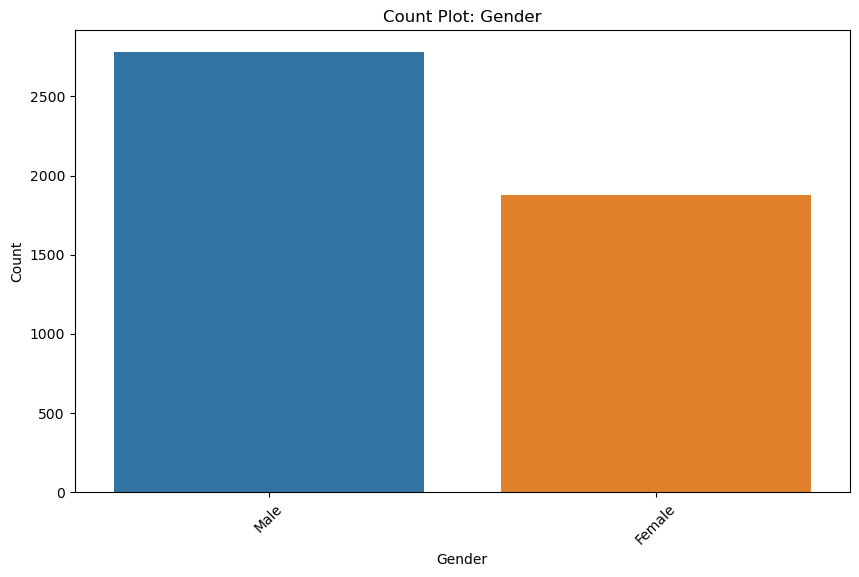

In [10]:
categorical_columns = list(df.select_dtypes(include=['object']).columns)

# Now visualize them 
# Use the extracted categorical columns in your function
for i in range(len(categorical_columns)-1):
    categorical_bivariate(df, categorical_columns[i])
        

In [11]:
categorical_test_statistic(df, categorical_columns, target="LeaveOrNot")

Chi-squared Statistic for Education: 101.83014138498626
P-value for Education: 7.724417739147332e-23
Degrees of Freedom for Education: 2
Expected Frequencies for Education:
[[2362.74511068 1238.25488932]
 [ 572.8065764   300.1934236 ]
 [ 117.44831292   61.55168708]]


Chi-squared Statistic for City: 206.15885400194648
P-value for City: 1.7106992135618012e-45
Degrees of Freedom for City: 2
Expected Frequencies for City:
[[1461.8706211   766.1293789 ]
 [ 759.14915109  397.85084891]
 [ 831.98022781  436.01977219]]


Chi-squared Statistic for Gender: 225.6953561969211
P-value for Gender: 5.177873883438753e-51
Degrees of Freedom for Gender: 1
Expected Frequencies for Gender:
[[1230.2546744  644.7453256]
 [1822.7453256  955.2546744]]


Chi-squared Statistic for EverBenched: 28.086147926708364
P-value for EverBenched: 1.1603340647939294e-07
Degrees of Freedom for EverBenched: 1
Expected Frequencies for EverBenched:
[[2739.36707501 1435.63292499]
 [ 313.63292499  164.36707501]]




{'Education': 7.724417739147332e-23,
 'City': 1.7106992135618012e-45,
 'Gender': 5.177873883438753e-51,
 'EverBenched': 1.1603340647939294e-07}

# 3 Numerical univariate analysis

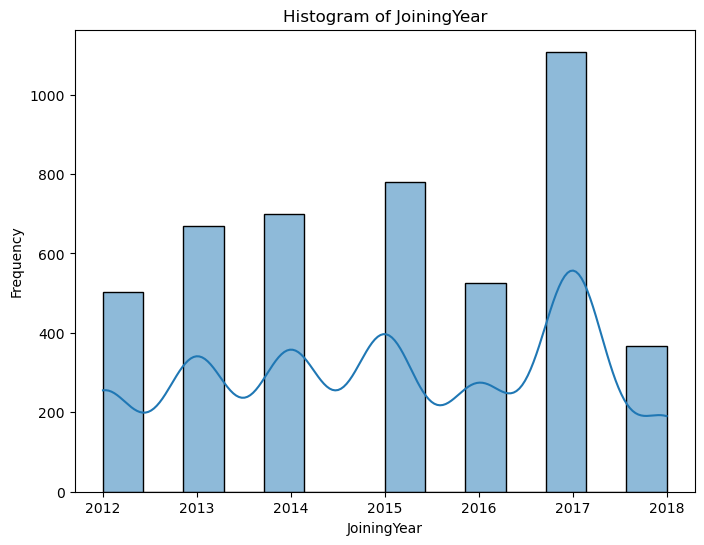

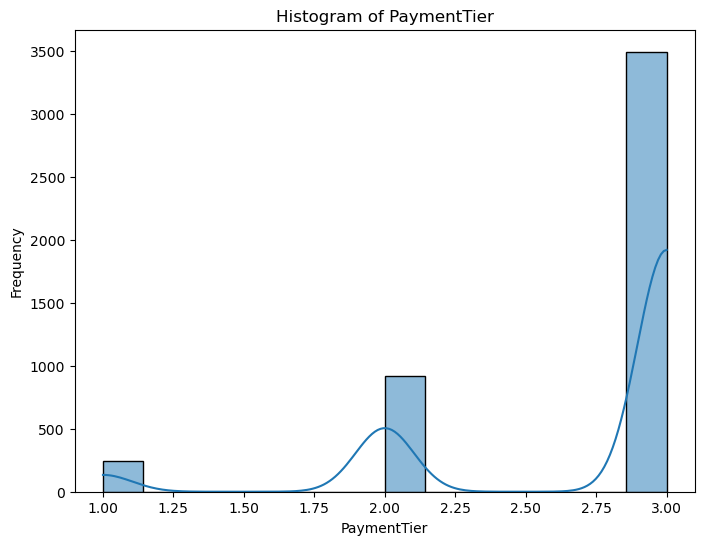

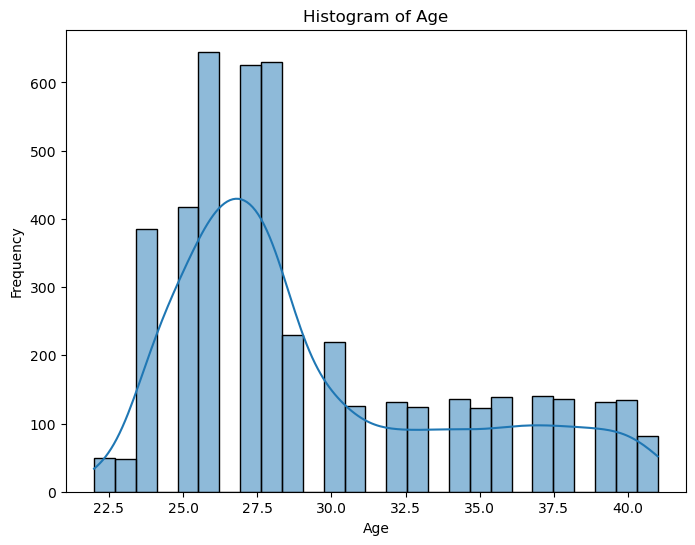

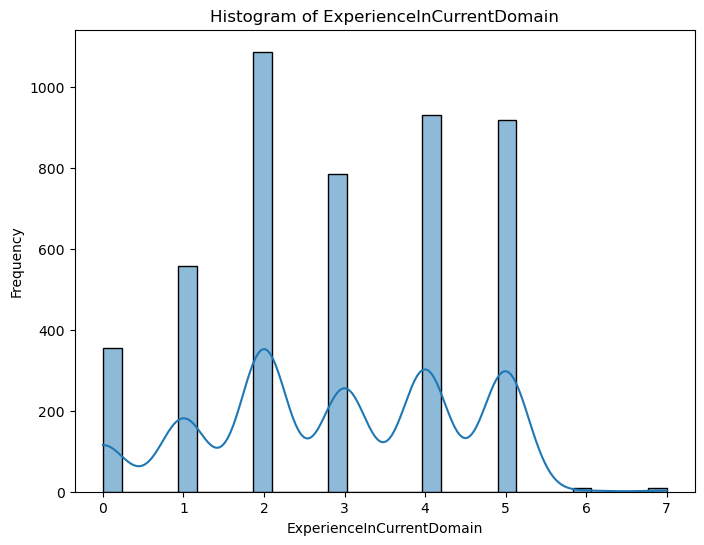

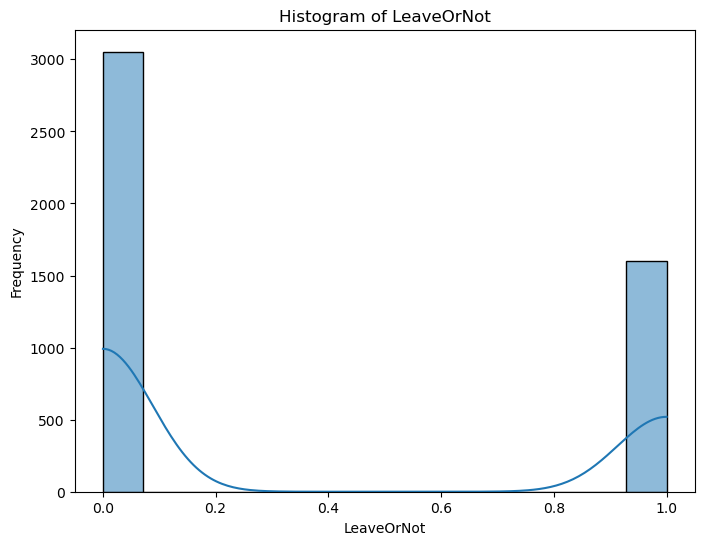

In [12]:
numerical_columns = list(df.select_dtypes(include='number').columns)

scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(df[numerical_columns])
scaled_df = pd.DataFrame(scaled_df, columns = numerical_columns)

numerical_univariate(df, numerical_columns)

# Numerical bivariate analysis

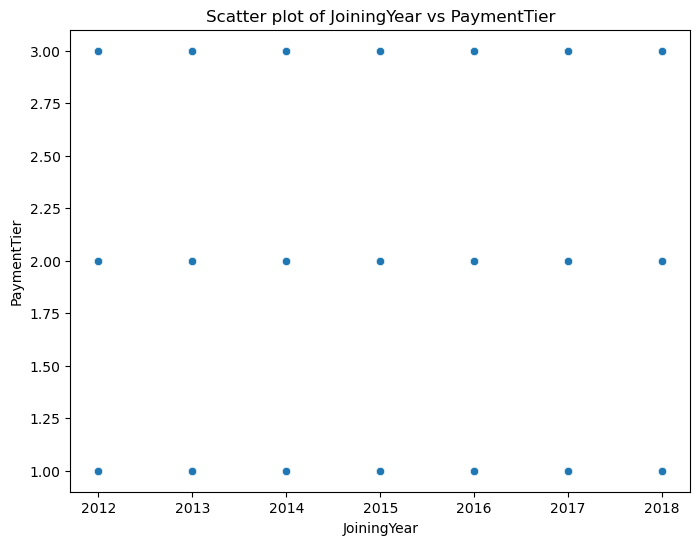

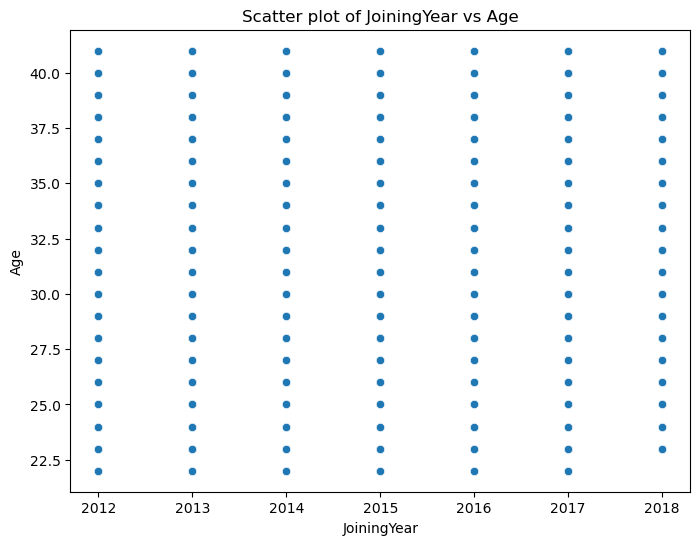

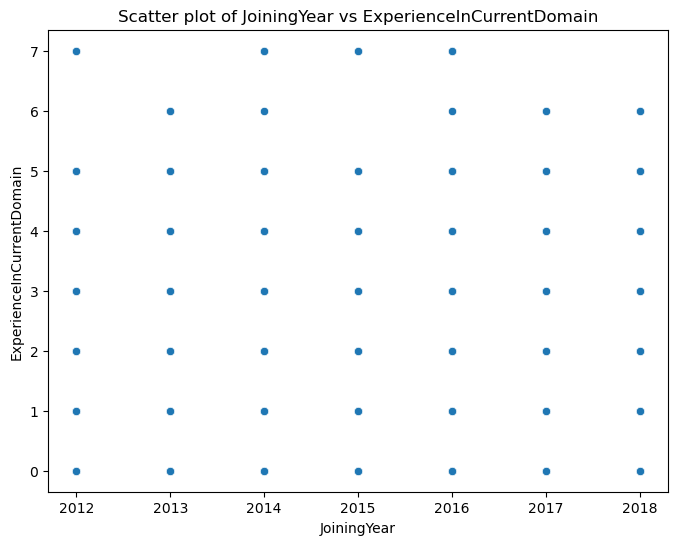

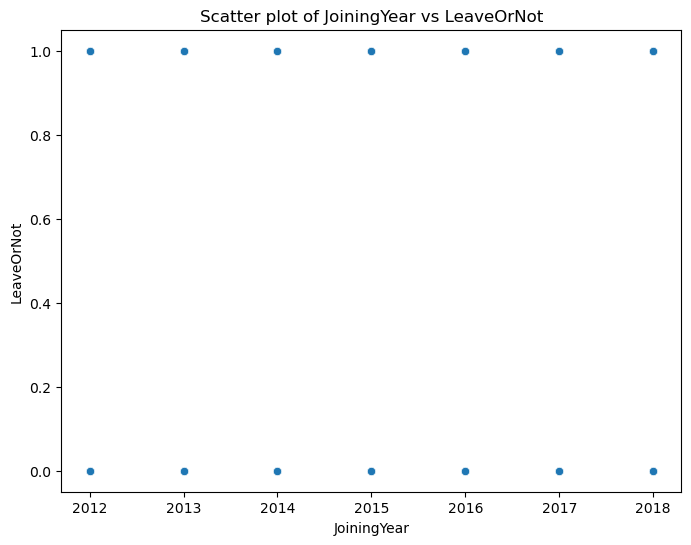

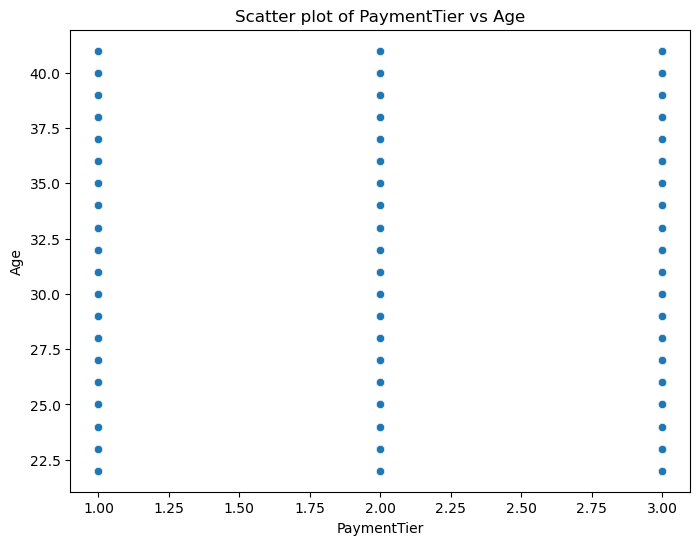

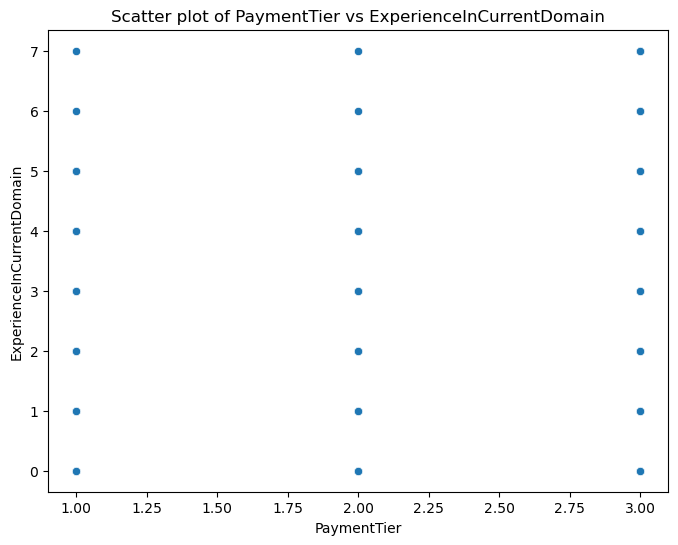

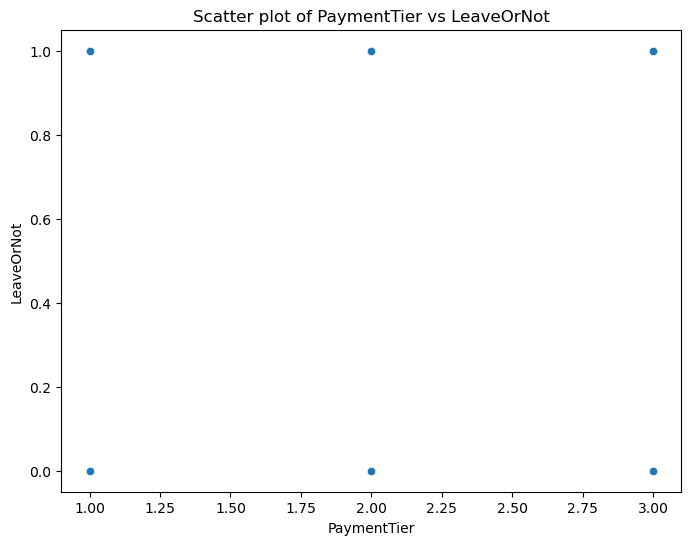

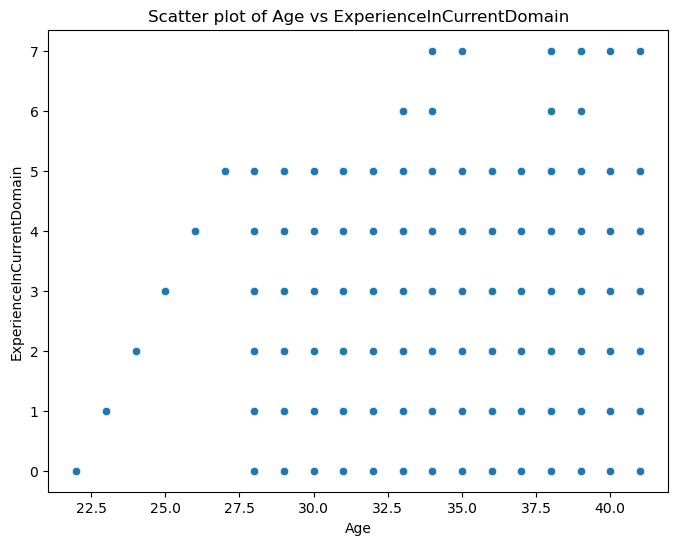

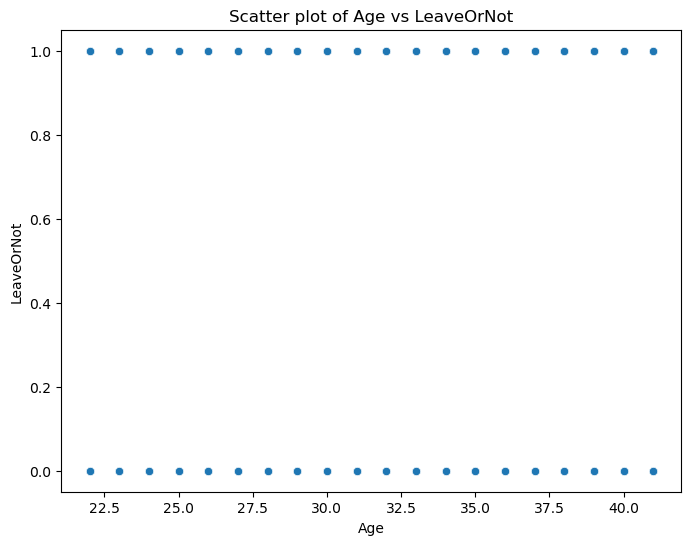

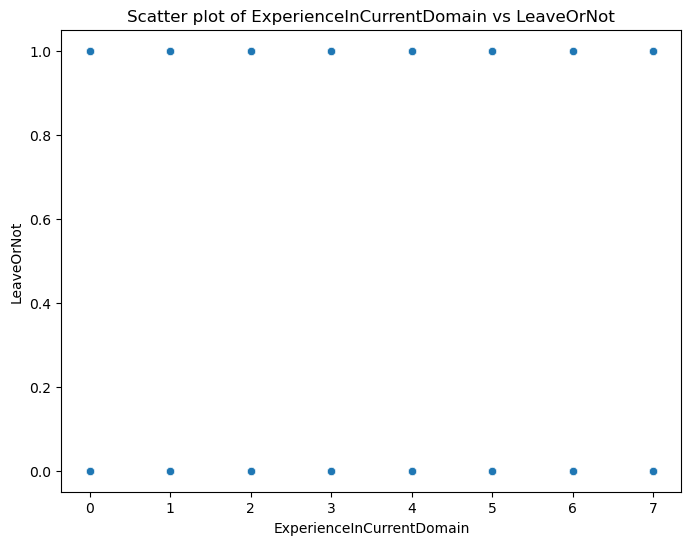

In [13]:
numerical_columns = [col for col in df.select_dtypes(include='number').columns]

scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(df[numerical_columns])
scaled_df = pd.DataFrame(scaled_df, columns=numerical_columns)

for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x = numerical_columns[i], y = numerical_columns[j], data=df)
        plt.title(f'Scatter plot of {numerical_columns[i]} vs {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()

In [14]:
numerical_test_statistic(df, numerical_columns, target = "LeaveOrNot")

Chi-squared Statistic for JoiningYear: 813.054592003363
P-value for JoiningYear: 2.3266155616241426e-172
Degrees of Freedom for JoiningYear: 6
Expected Frequencies for JoiningYear:
[[330.69245648 173.30754352]
 [438.95486783 230.04513217]
 [458.63894262 240.36105738]
 [512.44208038 268.55791962]
 [344.47130883 180.52869117]
 [726.99849559 381.00150441]
 [240.80184827 126.19815173]]


Chi-squared Statistic for PaymentTier: 338.6305486794045
P-value for PaymentTier: 2.9329904732261673e-74
Degrees of Freedom for PaymentTier: 2
Expected Frequencies for PaymentTier:
[[ 159.4410058    83.5589942 ]
 [ 602.33268859  315.66731141]
 [2291.22630561 1200.77369439]]


Chi-squared Statistic for Age: 35.46132959955463
P-value for Age: 0.012282490543246974
Degrees of Freedom for Age: 19
Expected Frequencies for Age:
[[ 32.15065549  16.84934451]
 [ 31.49451966  16.50548034]
 [252.61229314 132.38770686]
 [274.26477541 143.73522459]
 [423.20760799 221.79239201]
 [410.08489147 214.91510853]
 [413.3655706 

{'JoiningYear': 2.3266155616241426e-172,
 'PaymentTier': 2.9329904732261673e-74,
 'Age': 0.012282490543246974,
 'ExperienceInCurrentDomain': 0.050110055647237466,
 'LeaveOrNot': 0.0}

# Now we need to check certain relations between the data by visualizing them

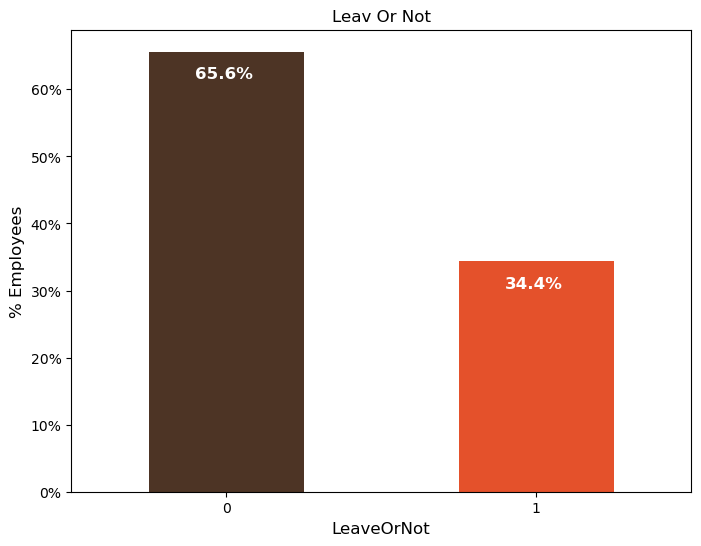

In [15]:
colors = ['#4D3425','#E4512B']

ax = (df['LeaveOrNot'].value_counts()*100.0 /len(df)).plot(
    kind='bar',
    stacked = True,
    rot = 0,
    color = colors,
    figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Employees',size = 12)
ax.set_xlabel('LeaveOrNot',size = 12)
ax.set_title('Leav Or Not', size = 12)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            color='white',
            weight = 'bold',
            size = 12)


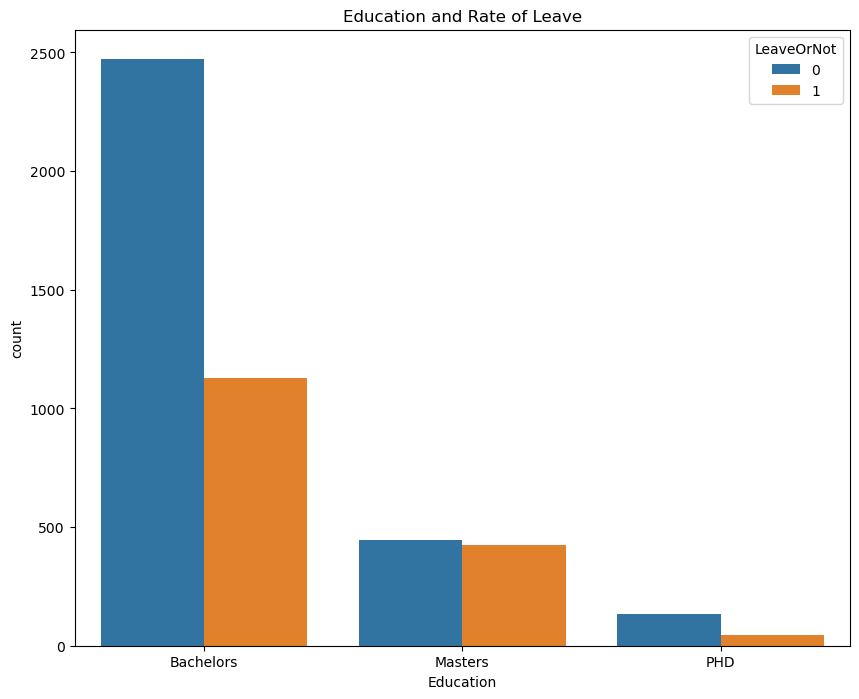

In [16]:
plt.figure(figsize = (10, 8))
sns.countplot(data = df, x = 'Education', hue = 'LeaveOrNot')
plt.title('Education and Rate of Leave')
plt.show()

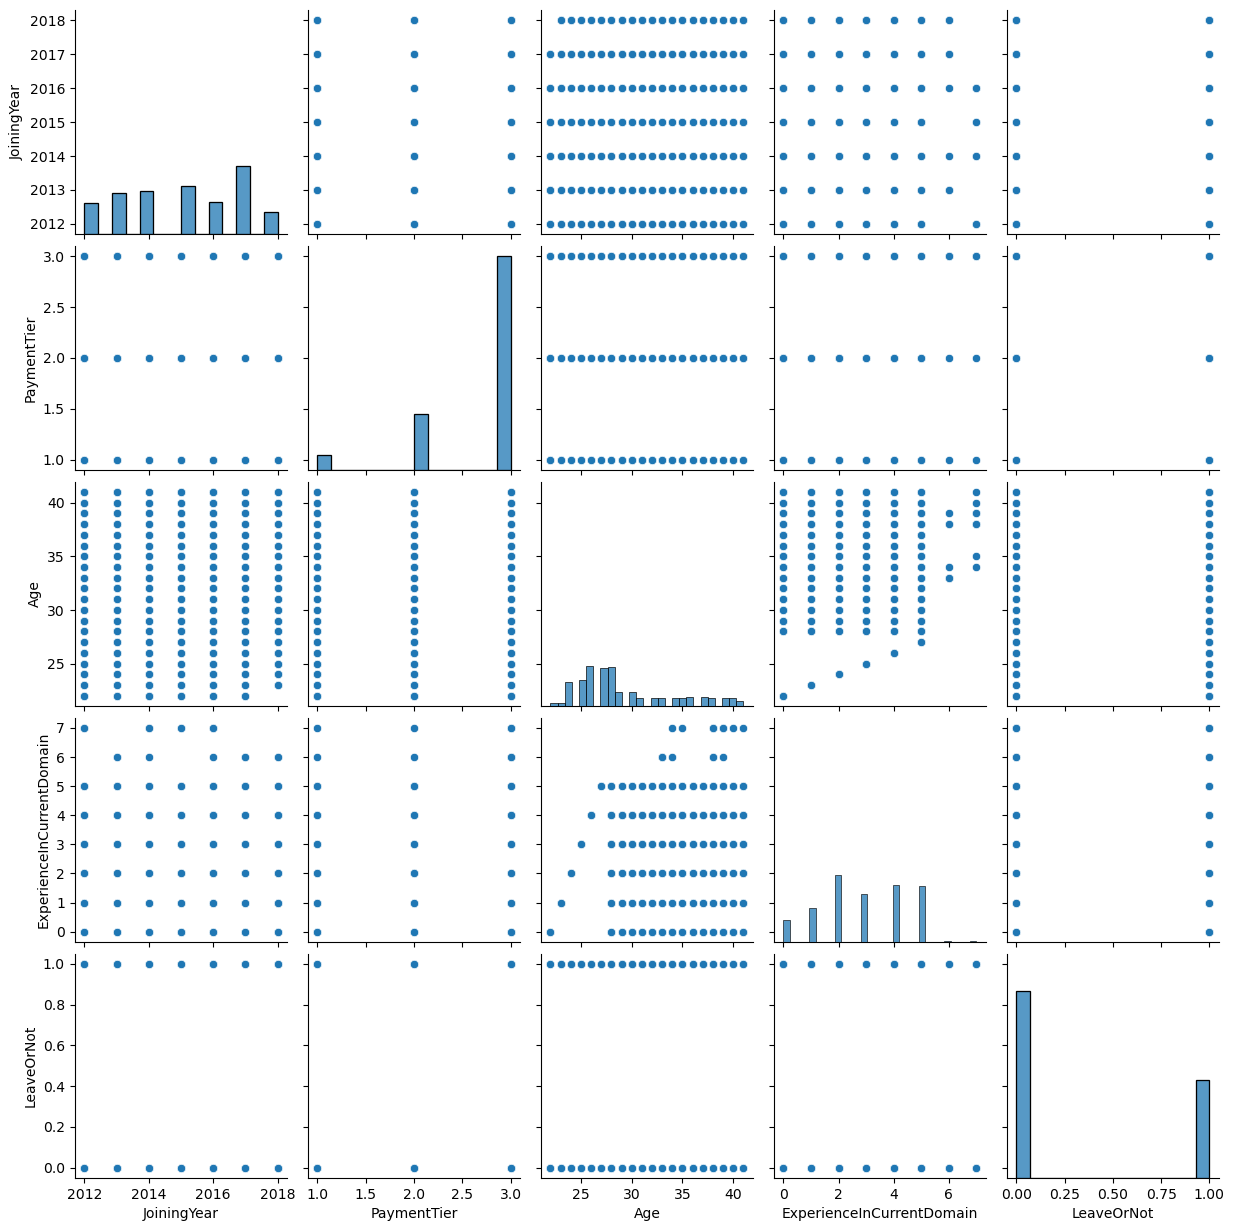

In [17]:
sns.pairplot(df)

In [18]:
corr_matrix = df.corr()
corr_matrix

C:\Users\MEAPAL\AppData\Local\Temp\ipykernel_37752\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


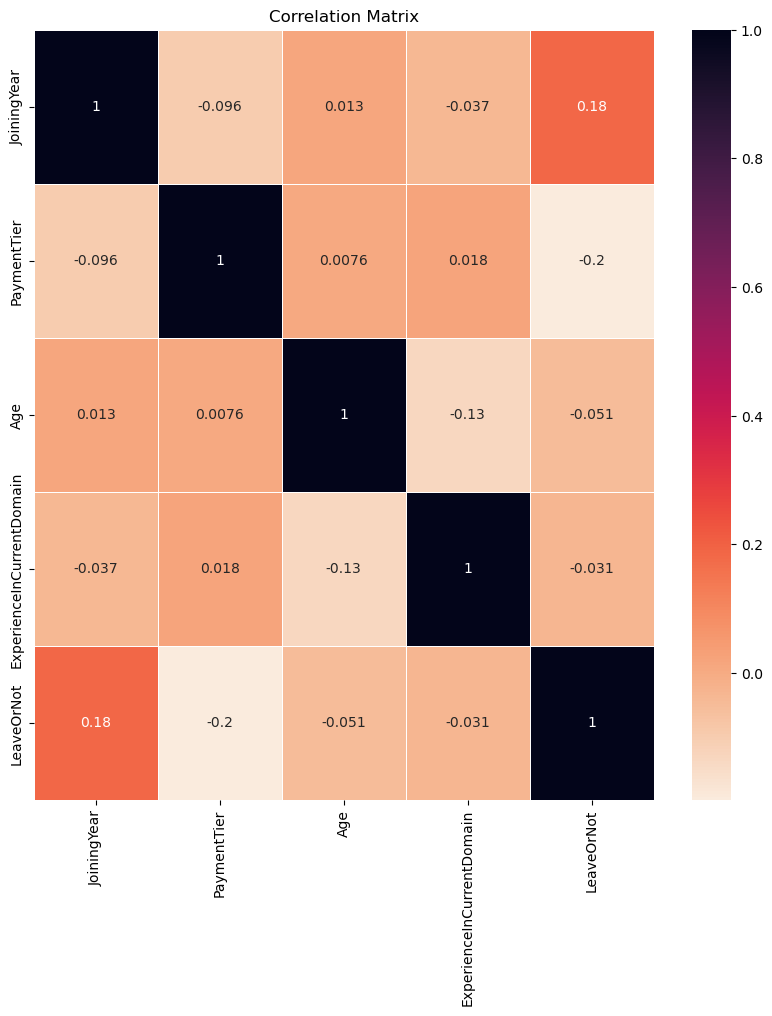

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'rocket_r', linewidths = .5)
plt.title('Correlation Matrix')
plt.show()

# Model training and testing

In [20]:
df['LeaveOrNot'].replace(to_replace='Yes', value=1, inplace=True)
df['LeaveOrNot'].replace(to_replace='No', value=0, inplace=True)

x = df.drop(columns = ['LeaveOrNot'])
y = df['LeaveOrNot'].values
print(df)

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

In [21]:
# Compute the pairwise correlations between features of a pandas DataFrame
corr = x.corr()
print("Correlation Coefficients")
print(corr)

Correlation Coefficients
                           JoiningYear  PaymentTier       Age  \
JoiningYear                   1.000000    -0.096078  0.013165   
PaymentTier                  -0.096078     1.000000  0.007631   
Age                           0.013165     0.007631  1.000000   
ExperienceInCurrentDomain    -0.036525     0.018314 -0.134643   

                           ExperienceInCurrentDomain  
JoiningYear                                -0.036525  
PaymentTier                                 0.018314  
Age                                        -0.134643  
ExperienceInCurrentDomain                   1.000000  


C:\Users\MEAPAL\AppData\Local\Temp\ipykernel_37752\1916464403.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = x.corr()


In [22]:
fig = px.scatter_matrix(df)
fig.show()

c:\Users\MEAPAL\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


<h3> After checking multiple times for multicollinearity I did not find any.

# Model training and testing

In [23]:
df_dummies = pd.get_dummies(df, columns=['Education', 'JoiningYear', 'City','PaymentTier', 'Gender', 'EverBenched'])
df_dummies.head()

,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,JoiningYear_2012,JoiningYear_2013,JoiningYear_2014,JoiningYear_2015,...,City_Bangalore,City_New Delhi,City_Pune,PaymentTier_1,PaymentTier_2,PaymentTier_3,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,34,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,28,3,1,1,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
2,38,2,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
3,27,5,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,24,2,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1


In [24]:
y = df_dummies['LeaveOrNot'].values
x = df_dummies.drop(columns = ['LeaveOrNot'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<h3> Logistic Regression

In [28]:
log_reg = LogisticRegression()

# Fit the logistic regression model to the training data
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [29]:
# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.8184747583243824
Confusion Matrix:
 [[571  39]
 [130 191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       610
           1       0.83      0.60      0.69       321

    accuracy                           0.82       931
   macro avg       0.82      0.77      0.78       931
weighted avg       0.82      0.82      0.81       931



<h3> SVC

In [35]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.80343716433942
Confusion Matrix:
 [[581  29]
 [154 167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       610
           1       0.85      0.52      0.65       321

    accuracy                           0.80       931
   macro avg       0.82      0.74      0.75       931
weighted avg       0.81      0.80      0.79       931



<h3> Naive Bayes

In [42]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(f"Gaussian Naive Bayes model accuracy : {accuracy_score(y_test, y_pred)*100} % " ) 

Gaussian Naive Bayes model accuracy : 78.83995703544576 % 


Check how to improve this value